# TP1 : Analyse des series temporelles 



Sur le site OPEN DATA/Réseaux énergie (https://opendata.reseaux-energies.fr/explore/?sort=modified), il s'y trouve de très intéressantes séries temporelles.

Nous avons téléchargé le fichier qui donne la consommation de gaz et d'électricité de 2012 à 2019 en France.

Afin d'illustrer les notions introduites en cours, nous allons étudier ce fichier (il est stocké sur moodle  "xxxx/consommation-quotidienne-brute.csv".

## L'objectif pour ce tp est de :

- Comprendre une série chronologique
- Décrire la série chronologique
- Visualiser et Analyser une série chronologique
- Décomposition de la série chronologique (tendance, saisonnalité, erreur)

## La structure de TP :

- Importation de la série
- Description de la série
- Visualisation de la série
- Décomposition de 




Lors de ce TP, nous allons utiliser la librairie pandas (en python).

In [1]:
import dateutil.parser
from dateutil.parser import parse 
import pandas as pd  # This is always assumed but is included here as an introduction.
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series

from pandas.plotting import autocorrelation_plot
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()


# Importation et Lecture des données

La 1ère étape consiste à importer le contenu du fichier et à l'étudier.

Le contenu du fichier sera importé dans un DataFrame par le biais read_csv


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv


Le séparateur de champ est le ';'.

In [2]:
# lecture d'un fichier csv 
# le séparateur est un ';' fonction "sep=';'"
# la fonction "parse_dates=['nom de la colonne']" permet de parser une date 
#                                  (format string vers format date)

dfb = pd.read_csv('consommation-quotidienne-brute_tr1.csv',sep=';',parse_dates=['Date - Heure','Date'])

print(dfb)

                     Date - Heure       Date  \
0       2012-01-01 15:00:00+01:00 2012-01-01   
1       2012-01-01 00:00:00+01:00 2012-01-01   
2       2012-01-01 21:00:00+01:00 2012-01-01   
3       2012-01-01 19:30:00+01:00 2012-01-01   
4       2012-01-01 09:30:00+01:00 2012-01-01   
...                           ...        ...   
131419  2019-06-02 07:30:00+02:00 2019-02-06   
131420  2019-06-02 11:30:00+02:00 2019-02-06   
131421  2019-06-02 14:00:00+02:00 2019-02-06   
131422  2019-06-02 14:30:00+02:00 2019-02-06   
131423  2019-06-02 15:00:00+02:00 2019-02-06   

        Consommation brute gaz (MW PCS 0°C) - GRTgaz  \
0                                            57452.0   
1                                            52099.0   
2                                            55249.0   
3                                                NaN   
4                                                NaN   
...                                              ...   
131419                         

La précision du séprateur permet de séparer les lignes sinon on a une seule variable textuel et non 7.

Attention les données ne sont pas classées temporellement.

Parser les colonnes dates est utile pour la suite. Dans un premier temps, tout est mis dans un dataframe. Plus tard 'date - heure' deviendra un index.

On peut remarquer des données manquantes. Attention ce n'est pas vraiment des données manquantes (les valeurs indiquées dans le tableau représente une consommation sur 30min ou sur une heure selon la colonne. L'indicateur temporel varie avec un pas de 30min.

Il existe une fonction python qui permet de les récupérer leur position et leur nombre (non demandé).



# Création de stat. descriptives permettant de décrire le fichier et les données qui le compose.

L'objectif est de décrire le contenu des données qui ont été importées.

On commencera par la lecture des informations du dataframe. 


Les fonctions dtypes et info peuvent être utiles. DataFrame permet le calcul d'un grand nombre de stat descriptives (cf. le lien ci après)

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html


# Description des données

In [20]:
print(dfb.dtypes)
print(dfb.info)

Date - Heure                                            object
Date                                            datetime64[ns]
Consommation brute gaz (MW PCS 0°C) - GRTgaz           float64
Consommation brute gaz (MW PCS 0°C) - Teréga           float64
Consommation brute gaz totale (MW PCS 0°C)             float64
Consommation brute électricité (MW) - RTE                int64
Consommation brute totale (MW)                         float64
dtype: object
<bound method DataFrame.info of                      Date - Heure       Date  \
0       2012-01-01 15:00:00+01:00 2012-01-01   
1       2012-01-01 00:00:00+01:00 2012-01-01   
2       2012-01-01 21:00:00+01:00 2012-01-01   
3       2012-01-01 19:30:00+01:00 2012-01-01   
4       2012-01-01 09:30:00+01:00 2012-01-01   
...                           ...        ...   
131419  2019-06-02 07:30:00+02:00 2019-02-06   
131420  2019-06-02 11:30:00+02:00 2019-02-06   
131421  2019-06-02 14:00:00+02:00 2019-02-06   
131422  2019-06-02 14:30:00+02:00

11 colonnes - 131424 lignes

Date - Heure                                     object

Date                                             object

Heure                                            object

Consommation brute gaz (MW PCS 0°C) - GRTgaz    float64

Statut - GRTgaz                                  object

Consommation brute gaz (MW PCS 0°C) - Teréga    float64

Statut - Teréga                                  object

Consommation brute gaz totale (MW PCS 0°C)      float64

Consommation brute électricité (MW) - RTE         int64

Statut - RTE                                     object

Consommation brute totale (MW)                  float64

On remarque que les dates ne sont pas triées.


# Statistique descriptive

In [21]:
dfb.describe()

,Consommation brute gaz (MW PCS 0°C) - GRTgaz,Consommation brute gaz (MW PCS 0°C) - Teréga,Consommation brute gaz totale (MW PCS 0°C),Consommation brute électricité (MW) - RTE,Consommation brute totale (MW)
count,65712.000000,65712.000000,65712.000000,131424.000000,65712.000000
mean,51152.940300,3314.210220,54467.150520,54718.357279,109184.567415
std,27590.970733,2204.023111,29722.287877,12180.205339,41007.504098
min,13174.000000,532.000000,13790.000000,29477.000000,45476.000000
25%,26797.750000,1424.000000,28259.750000,45515.750000,75227.750000
50%,44528.500000,2633.000000,47199.500000,52999.000000,98417.000000
75%,71927.250000,4853.000000,76862.500000,63153.000000,139527.250000
max,162432.000000,13621.000000,176040.000000,101866.000000,274815.000000


ne décrit pas les objets temporelles, n'indique pas les valeurs manquantes, il existe une fonction qui permet de récuperer les cellules ayant des données manquantes dans un dataframe.

Il y a 5 champs qui comportent des données de type 'float'

On remarque de fortes variations. On remarque la variation sur le nombre de valeurs (count). 
Oh nos données manquantes ! 

Date - Heure, Date, Heure

On retrouve la moyenne, la variance, la mediance, le max, le min et les quartiles

# Tranformation des données


On se concentrera sur la colonne 'Consommation brute électricité (MW) - RTE'.

On commencera par trier les données par date.

In [22]:
dft = dfb.sort_values(by='Date - Heure')
dftr = dft[['Date - Heure','Consommation brute électricité (MW) - RTE']]


dftdiff = dftr.diff()
dftdiff = dftdiff.assign(d=dfb[['Date - Heure']])
#ajout d'un colonne donnant la date
# permet de connaitre l'heure où la différence es égale à 0 où à 1h30

In [23]:
dftdiff.sort_values(by='Date - Heure')
#'d' : indique la date-heure
#'Date - Heure ' : donne la diff. entre 2 instants consécutifs


,Date - Heure,Consommation brute électricité (MW) - RTE,d
5158,0:00:00,908.0,2016-03-27 03:30:00+02:00
129076,0:00:00,-542.0,2019-03-31 03:00:00+02:00
34544,0:00:00,0.0,2016-03-27 03:00:00+02:00
99098,0:00:00,0.0,2017-03-26 03:00:00+02:00
13339,0:00:00,-733.0,2017-03-26 03:30:00+02:00
...,...,...,...
65331,1:30:00,-979.0,2017-10-29 02:00:00+01:00
51521,1:30:00,-861.0,2014-10-26 02:00:00+01:00
96400,1:30:00,-680.0,2015-10-25 02:00:00+01:00
106973,1:30:00,-810.0,2016-10-30 02:00:00+01:00


Peut-on expliquer que dans la variation temporelle des différence de 0:00 et de 1:30 
        apparaissent ?
        
Jusqu'à maintenant deux fois par an, on remonte ou on retarde nos montres d'une heure.

Il vous suffit de faire une recherche sur google sur les dates de changeme,t d'heure pour valider cette hypothèse

exemple 2016 : nuit du 26 au 27 mars

Toutes les valeurs sont prises sur des intervalles de 30 min mais en raison du changement horaire on a :
2h00
2h30
2h00 (3h00 - 1H00)
2h30

La time réordonne temporellement la série.

Est-ce génant d'avoir une valeur de plus ou de moins ? 

# Visualisation des données

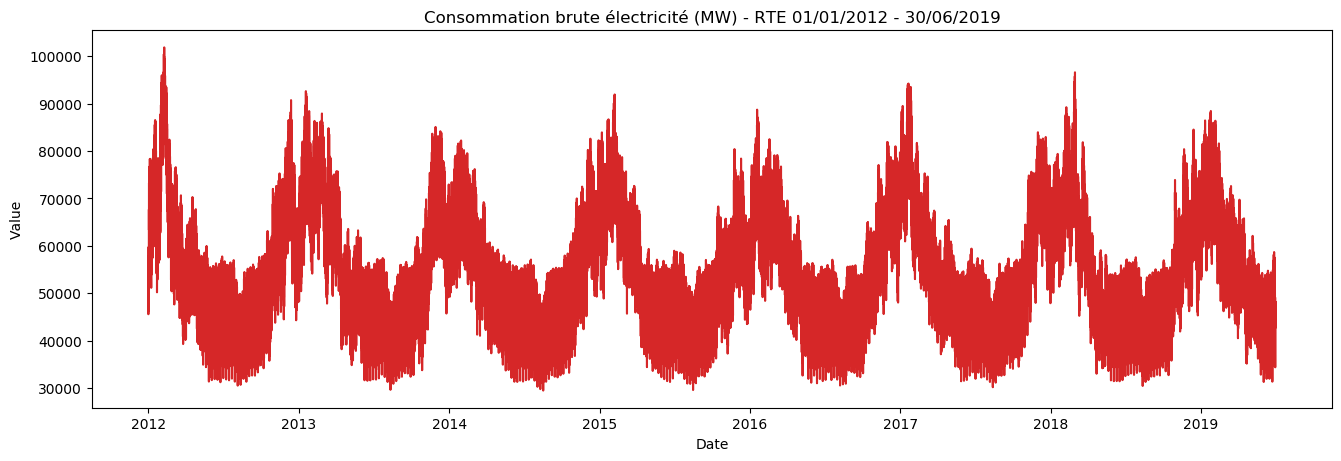

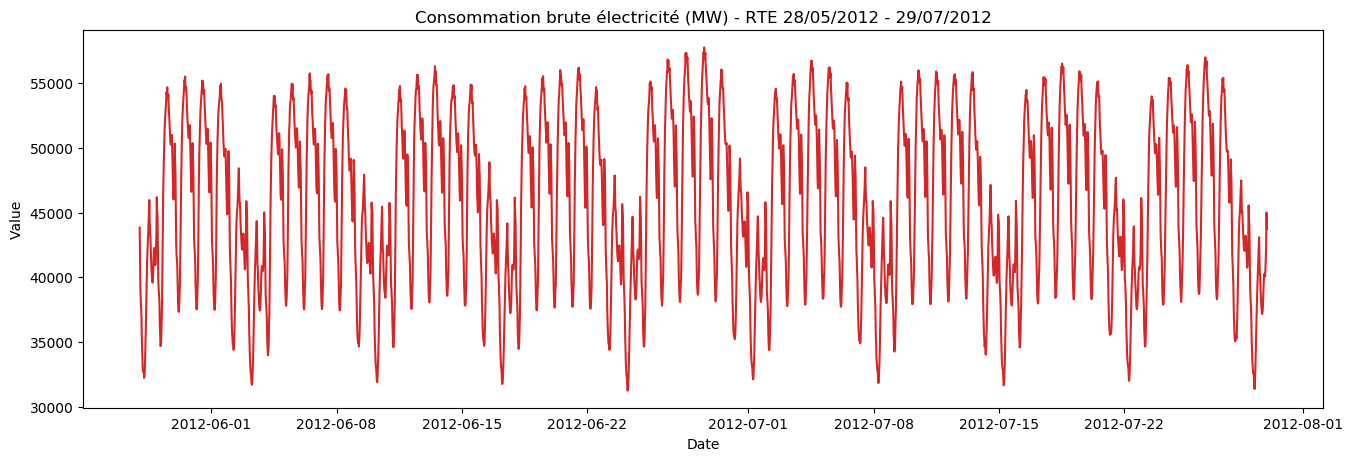

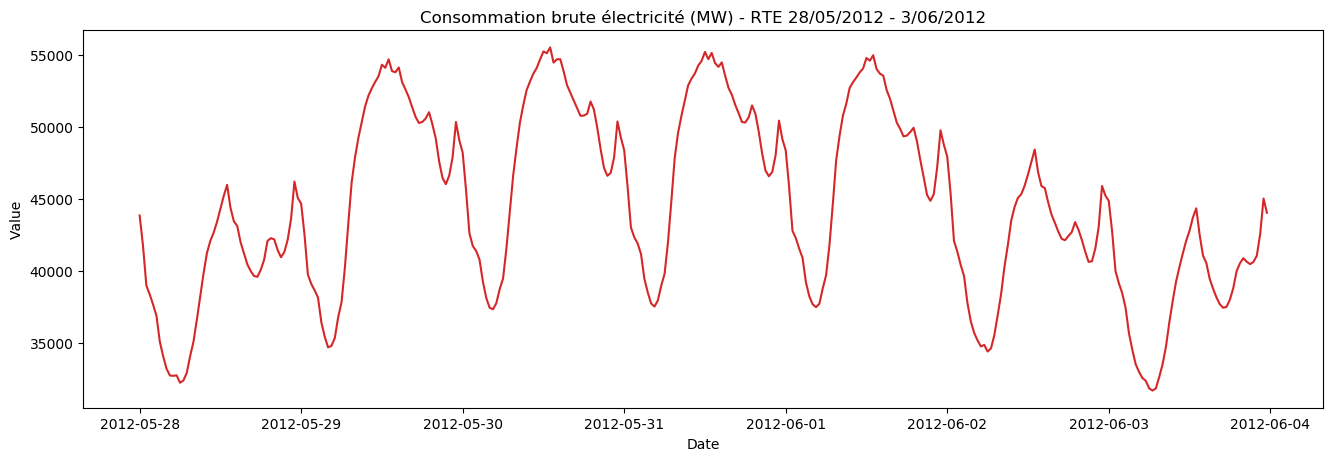

In [24]:
# Affichage
def plot_df(df, x, y, title="qu'est-ce ?", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(dft, x=dft[['Date - Heure']], y=dft[['Consommation brute électricité (MW) - RTE']],title='Consommation brute électricité (MW) - RTE 01/01/2012 - 30/06/2019') 

plot_df(dft, x=dft[7104:10128][['Date - Heure']], y=dft[7104:10128][['Consommation brute électricité (MW) - RTE']],title= 'Consommation brute électricité (MW) - RTE 28/05/2012 - 29/07/2012') 

plot_df(dft, x=dft[7104:7440][['Date - Heure']], y=dft[7104:7440][['Consommation brute électricité (MW) - RTE']],title = 'Consommation brute électricité (MW) - RTE 28/05/2012 - 3/06/2012') 




Le première figure affiche l'intégralité de l'intervalle de temps.
Afficher 131424 valeurs donne cette effet de "ruban".
On remarque qu'une périodicité annuelle est possible.

La deuxième figure affiche une période de temps de 9 semaine. 
On remarque un pattern qui semble périodique sur une semaine et qui ne semble pas évoluer dans le temps.

La troisième figure (1 semaine) fait afficher une périodicité journalière (on peut distinguer 3 types de journées : les lundi-mardi-mercredi-jeudi, le vendredi, les samedi-dimanche


Nous allons créer 3 séries, en sommant respectivement les valeurs sur la jouenée, le mois et l'année.

In [25]:
dftr.loc[:,'Date - Heure'] = pd.to_datetime(dftr['Date - Heure'],utc=True)
dftr.index = dftr['Date - Heure']

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


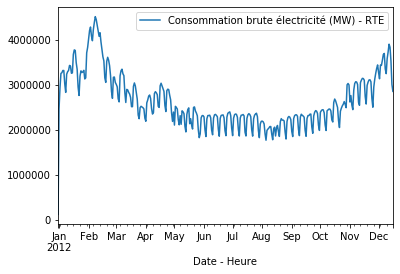

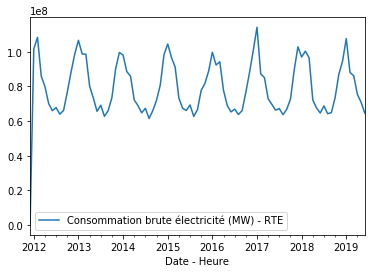

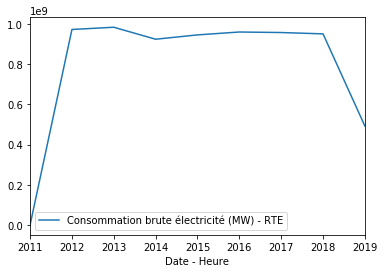

In [26]:
dftd = dftr.resample('D').sum()
dftd[0:352][['Consommation brute électricité (MW) - RTE']].plot()

dftm = dftr.resample('M').sum()
dftm[['Consommation brute électricité (MW) - RTE']].plot()

dfty = dftr.resample('Y').sum()
dfty[['Consommation brute électricité (MW) - RTE']].plot()




La figure 3 montre que la consommation électrique annuelle semble constante 

La figure 2 illustre la périodicité annuelle

La figure 1 (afficher sur une période de 1 an) montre les 52 semaines.

On va maintenant superposer la consommation journalière pour chaque année.

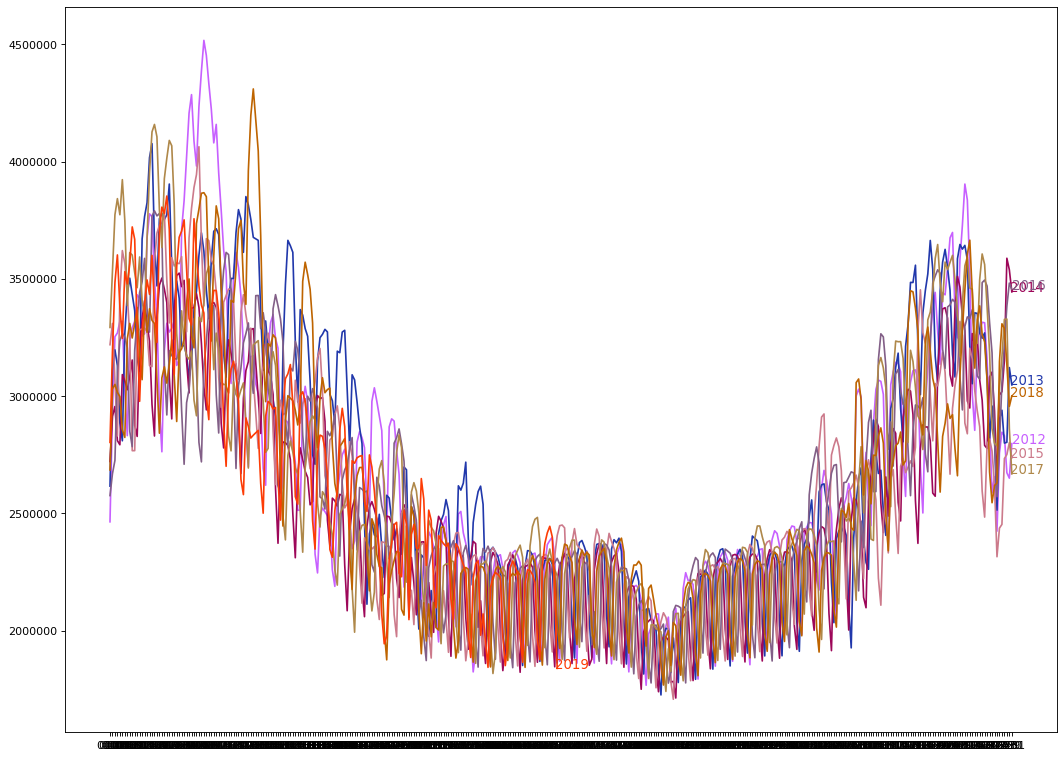

In [27]:
# Import Data

import matplotlib as mpl
dftd.reset_index(inplace=True)
dftd['year'] = pd.DatetimeIndex(dftd['Date - Heure']).year  

dftd['MonthDay'] = dftd['Date - Heure'].apply(lambda x:x.strftime('%m%d'))
years = dftd['year'].unique()

dftd = dftd.sort_values(by='Date - Heure')

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('MonthDay', 'Consommation brute électricité (MW) - RTE', data=dftd.loc[dftd.year==y, :], color=mycolors[i], label=y)
        plt.text(dftd.loc[dftd.year==y, :].shape[0]-.9, dftd.loc[dftd.year==y, 'Consommation brute électricité (MW) - RTE'][-1:].values[0], y, fontsize=12, color=mycolors[i])



On remarque que les semaines se décale d'une année à l'autre
Mais que globalement on a une tendance qui se ressemble.

La même chose en considérant la sére mensuelle

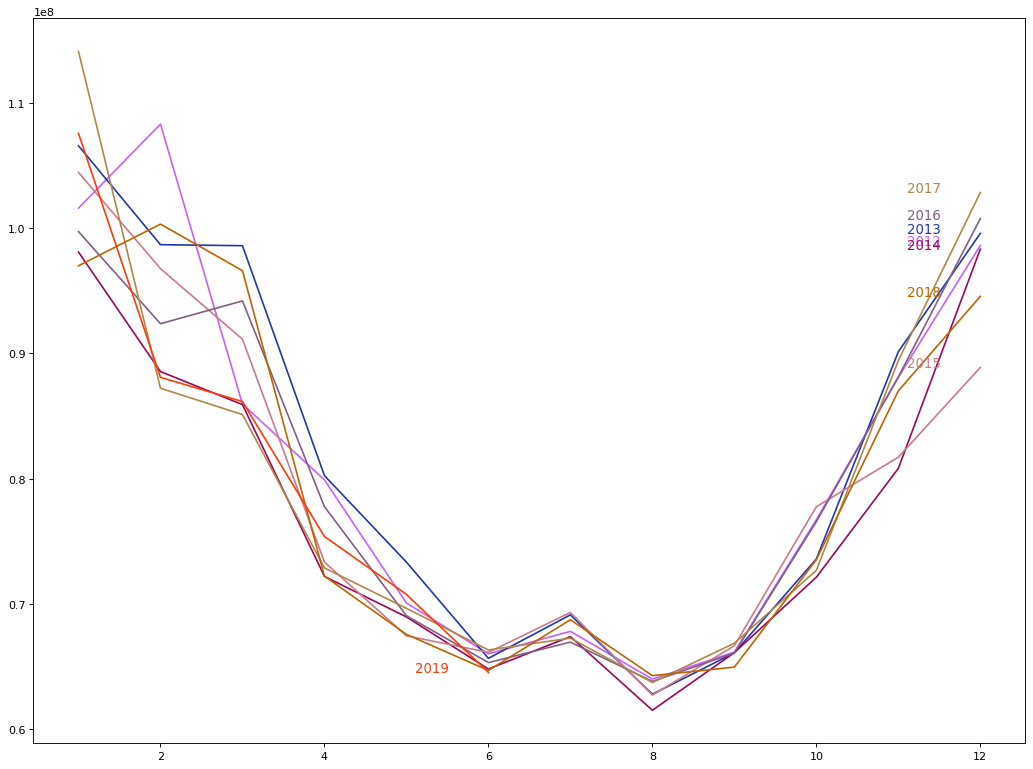

In [28]:
import matplotlib as mpl
dftm.reset_index(inplace=True)
dftm['year'] = pd.DatetimeIndex(dftm['Date - Heure']).year  
dftm['month'] = pd.DatetimeIndex(dftm['Date - Heure']).month  

#dftd['MonthDay'] = dftd['Date - Heure'].apply(lambda x:x.strftime('%m%d'))
years = dftd['year'].unique()

dftm = dftm.sort_values(by='Date - Heure')

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'Consommation brute électricité (MW) - RTE', data=dftm.loc[dftm.year==y, :], color=mycolors[i], label=y)
        plt.text(dftm.loc[dftm.year==y, :].shape[0]-.9, dftm.loc[dftm.year==y, 'Consommation brute électricité (MW) - RTE'][-1:].values[0], y, fontsize=12, color=mycolors[i])




On remarque une grande variabilité en hiver qu'en été.

La ressemblance est plus visible

On va maintenant étudier la variation des corrélations (ACF : fonction d'autocorélation)


Sur la série complète

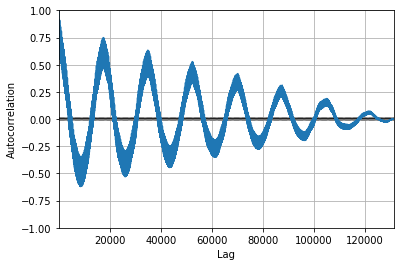

In [29]:


autocorrelation_plot(dftr[['Consommation brute électricité (MW) - RTE']])

On voit apparaitre une forme de sinusoïde (en ruban) qui s'attenue avec le temps.

Je rappelle qu'il y a 48 mesures par jour et 365 jours dans l'année (ce qui semble correspondre à la périodicité de la sinusoïde)

Sur la série journalière

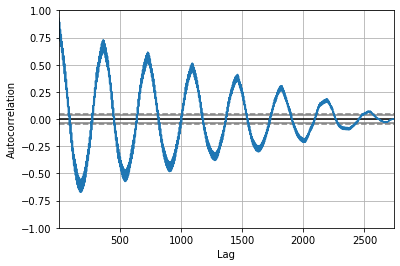

In [30]:
autocorrelation_plot(dftd[['Consommation brute électricité (MW) - RTE']])

On voit apparaitre une périodicité de 365 jours, la variarion sur la journée qui a disparu, fait que la largeur du "ruban" est plus faible.

Application sur la série mensuelle

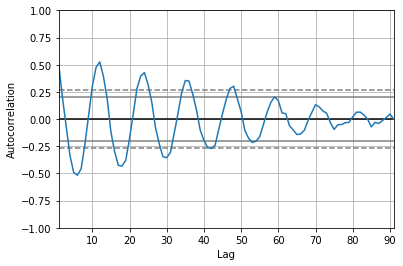

In [31]:
autocorrelation_plot(dftm[['Consommation brute électricité (MW) - RTE']])

On voit apparaitre une périodicité de 12 mois

Application sur un intervalle de temps de 9 semaines (la série des 30min)

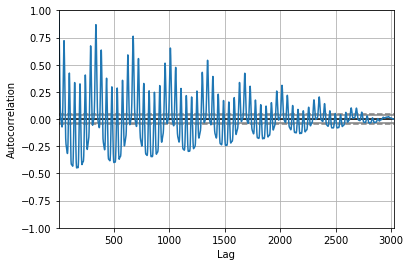

In [32]:
autocorrelation_plot(dftr[7104:10128][['Consommation brute électricité (MW) - RTE']])

On voit apparaitre plusieurs périodicités (journalière et semaine)

Application sur un sous-échantillonnage d'une semaine

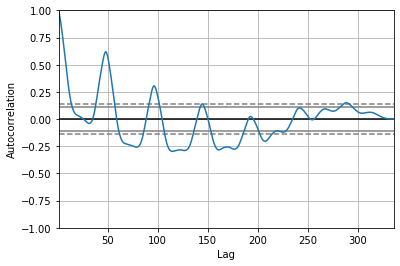

In [33]:
autocorrelation_plot(dftr[7104:7440][['Consommation brute électricité (MW) - RTE']])

# Modélisation de la série temporelle

On veut éliminer la composante tendance sur la série mensuelle

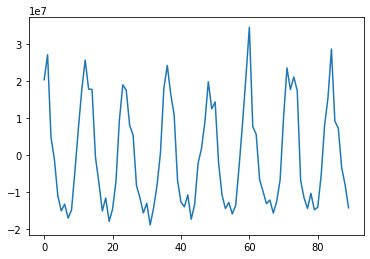

In [34]:
# Using scipy: Subtract the line of best fit
from scipy import signal


detrended = signal.detrend(dftm[1:]['Consommation brute électricité (MW) - RTE'].values)
plt.plot(detrended)



Décomposition de la série mensuelle en utilisant la librairie statsmodels et la fonction seasonal_decompose

On essaiera les modèles additif et multiplicatif

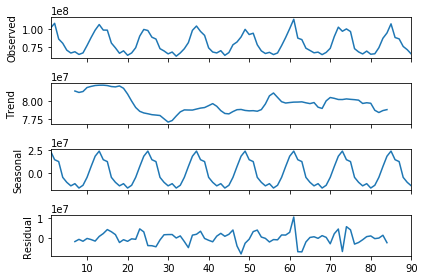

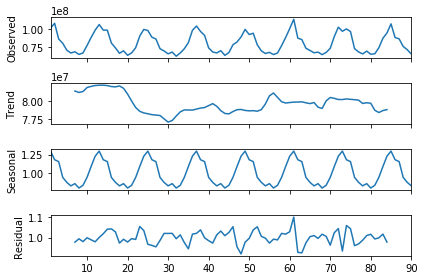

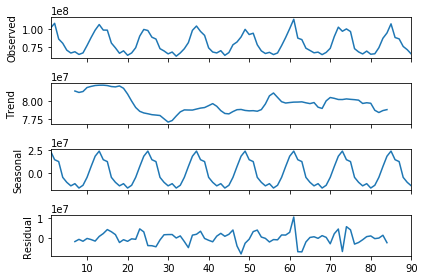

In [35]:

# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(dftm[1:]['Consommation brute électricité (MW) - RTE'], model='multiplicative', freq=12)
result_mul.plot()

result_mul1 = seasonal_decompose(dftm[1:]['Consommation brute électricité (MW) - RTE'], model='additive', freq=12)
result_mul1.plot()
#detrended = dftm[1:]['Consommation brute électricité (MW) - RTE'].values - result_mul.trend
#plt.plot(detrended)

$\bullet$ Modélisation de la tendance par un polynome



In [56]:
result = result_mul.observed[6:84]-result_mul.seasonal[6:84]

Slope -14308.596099618271
NRMSE: 0.11336331525756019
A    float64
dtype: object


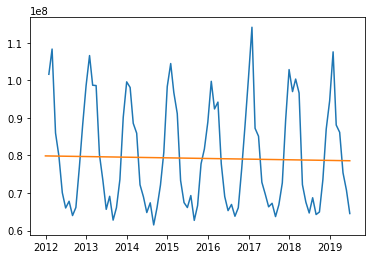

In [65]:
dftm.index = dftm['Date - Heure']

coefficients, residuals, _, _, _ = np.polyfit(range(len(result[:])),result[:],1,full=True)



mse = residuals[0]/(len(dftm['Date - Heure']))
nrmse = np.sqrt(mse)/(dftm['Consommation brute électricité (MW) - RTE'].max() - dftm['Consommation brute électricité (MW) - RTE'].min())
print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))

plt.plot(dftm[1:]['Consommation brute électricité (MW) - RTE'])

res = [coefficients[0]*x + coefficients[1] for x in range(len(dftm))]
dfr = pd.DataFrame(res,index = dftm.index,columns=['A'])
print(dfr.dtypes)

plt.plot(dftm.index,res)
plt.show()
